In [1]:
import pandas as pd

# Load the files
csv_file = pd.read_csv('base_Reto (2).csv', encoding='latin1')
xlsx_file = pd.read_excel('Base_reto_periodo_3 (1).xlsx', sheet_name='periodo 3')

# Merge the two files on "Solicitud_id" and keep only the matching rows
merged_data = pd.merge(csv_file, xlsx_file, on='Solicitud_id', how='inner')

# Identify duplicate "Solicitud_id" entries in the merged dataset
duplicated_solicitud_ids = merged_data[merged_data.duplicated(subset=['Solicitud_id'], keep=False)]

# Step 1: Filter duplicates that have identical data across all columns (drop those)
exact_duplicates = duplicated_solicitud_ids[duplicated_solicitud_ids.duplicated(keep=False)]

# Step 2: From remaining duplicates, only keep those with variations in at least 14 columns
remaining_duplicates = duplicated_solicitud_ids.drop(exact_duplicates.index)
variations_in_columns = remaining_duplicates.groupby('Solicitud_id').nunique(dropna=False).gt(1).sum(axis=1)

# Filter to keep only duplicates with variations in at least 14 columns
duplicates_with_variation = remaining_duplicates[remaining_duplicates['Solicitud_id'].isin(variations_in_columns[variations_in_columns >= 14].index)]

# Step 3: Remove "Solicitud_id" with more than 30 duplicates
solicitud_counts = merged_data['Solicitud_id'].value_counts()
ids_to_remove = solicitud_counts[solicitud_counts > 30].index
filtered_merged_data = merged_data[~merged_data['Solicitud_id'].isin(ids_to_remove)]

# Step 4: Remove all duplicates, keeping only one row per "Solicitud_id"
final_filtered_data = filtered_merged_data.drop_duplicates(subset=['Solicitud_id'], keep='first')

# Export the filtered data to a CSV file
final_filtered_data.to_csv('filtered_merged_data_unique.csv', index=False)

# Display the filtered data
final_filtered_data


,Solicitud_id,Aprobado,Hit_Buro_Huella,Malo,Num_IQ_U3M_PL_Financieras,Edad_cliente,Porcentaje_cuentas_abiertas,Num_IQ_U3M,Num_IQ_U3M_TDC_Banco,MaxMOP_U3M,...,Disciplina_tech,Cluster_sucursales,Linea credito,tasa interés,Plazo_Meses,Pago,Nivel_Atraso,Interacciones,Oferta de cobranza,Estatus_Cuenta
0,1993059.0,1,11,0,0,61,0.300000,1,0,2,...,87,1,25500,40,48,1176.416083,atraso_120_149,"[{'Tipo_GestiÃ³n': 'Agencias Especializadas', ...",Reestructura del CrÃ©dito,Cuenta Deteriorada
1,1993287.0,1,11,1,0,67,0.750000,1,0,9,...,-2,1,22500,40,36,1168.077011,atraso_30_59,"[{'Tipo_GestiÃ³n': 'Call Center', 'Resultado':...",Tus Pesos Valen MÃ¡s,Cuenta Contenida
2,1993534.0,1,11,1,4,63,0.312500,12,0,9,...,57,3,51500,65,48,3419.411290,atraso_1_29,"[{'Tipo_GestiÃ³n': 'Call Center', 'Resultado':...",Reestructura del CrÃ©dito,Cuenta Deteriorada
3,1995491.0,1,11,0,1,67,1.000000,3,0,9,...,71,3,5500,60,12,648.849704,atraso_1_29,"[{'Tipo_GestiÃ³n': 'Call Center', 'Resultado':...",Reestructura del CrÃ©dito,Cuenta Regularizada
4,1995795.0,1,10,1,0,53,0.205128,11,0,9,...,-1,1,95500,60,36,6376.752037,atraso_120_149,"[{'Tipo_GestiÃ³n': 'Agencias Especializadas', ...",Pago sin Beneficio,Cuenta Deteriorada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931,7372548.0,1,11,0,1,61,0.111111,3,-2,2,...,54,3,52000,50,24,3707.624669,atraso_30_59,"[{'Tipo_GestiÃ³n': 'GestiÃ³n Puerta a Puerta',...",Reestructura del CrÃ©dito,Cuenta Contenida
5932,7373175.0,1,10,1,-2,63,0.142857,4,-2,3,...,-1,1,15500,65,24,1267.546257,atraso_180_mÃ¡s,"[{'Tipo_GestiÃ³n': 'GestiÃ³n Puerta a Puerta',...",Reestructura del CrÃ©dito,Cuenta Regularizada
5933,7373878.0,1,11,0,-2,58,0.190476,5,2,9,...,47,3,10500,65,12,1271.935638,atraso_30_59,"[{'Tipo_GestiÃ³n': 'Agencias Especializadas', ...",Quita / Castigo,Cuenta Contenida
5934,7373973.0,1,11,0,-2,68,0.140845,6,-2,9,...,-2,3,23500,75,48,1765.083071,atraso_1_29,"[{'Tipo_GestiÃ³n': 'Agencias Especializadas', ...",Reestructura del CrÃ©dito,Cuenta Regularizada


In [2]:
import pandas as pd

# Paso 1: Cargar los archivos
csv_file = pd.read_csv('base_Reto (2).csv', encoding='latin1')
xlsx_file = pd.read_excel('Base_reto_periodo_3 (1).xlsx', sheet_name='periodo 3')

# Paso 2: Contar la frecuencia de los 'Solicitud_id' en cada dataset
csv_id_counts = csv_file['Solicitud_id'].value_counts()
xlsx_id_counts = xlsx_file['Solicitud_id'].value_counts()

# Paso 3: Filtrar IDs con más de una ocurrencia
csv_duplicated_ids = csv_id_counts[csv_id_counts > 1]
xlsx_duplicated_ids = xlsx_id_counts[xlsx_id_counts > 1]

# Paso 4: Mostrar los resultados
print("IDs duplicados en el CSV:")
print(csv_duplicated_ids)

print("\nIDs duplicados en el archivo Excel:")
print(xlsx_duplicated_ids)


IDs duplicados en el CSV:
Solicitud_id
2.090000e+12    750
6.321202e+06      2
5.498217e+06      2
6.559880e+06      2
6.233460e+06      2
6.779064e+06      2
5.995428e+06      2
5.708167e+06      2
2.076887e+06      2
5.881523e+06      2
2.532773e+06      2
5.953495e+06      2
5.832959e+06      2
6.389773e+06      2
7.189559e+06      2
5.499737e+06      2
6.052276e+06      2
2.252789e+06      2
Name: count, dtype: int64

IDs duplicados en el archivo Excel:
Solicitud_id
2090000000000    36
6389773           2
Name: count, dtype: int64


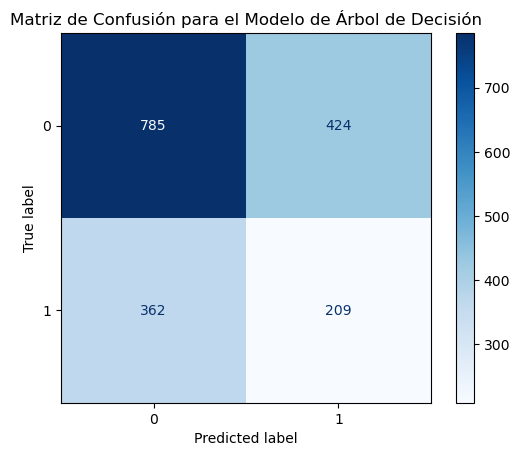

Exactitud: 0.5584
Puntuación F1: 0.5640


In [3]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Cargar el archivo de datos
data_path = 'filtered_merged_data_unique.csv'
data = pd.read_csv(data_path)

# Paso 1: Limpieza inicial
data['Entidad_federativa'] = data['Entidad_federativa'].fillna(data['Entidad_federativa'].mode()[0])
data['Tipo_suscripcion'] = data['Tipo_suscripcion'].fillna('Desconocido')

# Paso 2: Análisis de Solicitud_id repetidos y creación de variables agregadas
client_aggregates = data.groupby('Solicitud_id').agg(
    total_solicitudes=('Solicitud_id', 'size'),
    promedio_credito=('Linea credito', 'mean'),
    promedio_plazo_meses=('Plazo_Meses', 'mean'),
    promedio_pago=('Pago', 'mean')
).reset_index()

# Unir los agregados con el conjunto de datos original
data = pd.merge(data, client_aggregates, on='Solicitud_id', how='left')

# Paso 3: Calcular la capacidad de pago para cada solicitud
data['Capacidad_de_pago'] = data['Ingreso_Bruto'] / (data['Pago'] + 1)

# Paso 4: Convertir Estatus_Cuenta a binario (1 para "Cuenta Deteriorada", 0 para otros estados)
data['Estatus_Cuenta'] = data['Estatus_Cuenta'].apply(lambda x: 1 if x == "Cuenta Deteriorada" else 0)

# Paso 5: Codificación de variables categóricas
categorical_columns = ['Entidad_federativa', 'Tipo_suscripcion', 'Nivel_Atraso', 'Oferta de cobranza']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

# Paso 6: Normalización de las columnas numéricas
# Excluir 'Solicitud_id' de las columnas numéricas a escalar
numeric_columns = data.select_dtypes(include=[float, int]).columns.difference(['Estatus_Cuenta', 'Solicitud_id'])
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Paso 7: Definir las características (X) y la variable objetivo (y)
X = data.drop(columns=['Solicitud_id', 'Estatus_Cuenta', 'Interacciones'])
y = data['Estatus_Cuenta']

# Paso 8: Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 9: Entrenar el modelo de Árbol de Decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Paso 10: Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión para el Modelo de Árbol de Decisión')
plt.show()

# Mostrar resultados de evaluación
print(f'Exactitud: {accuracy:.4f}')
print(f'Puntuación F1: {f1:.4f}')
#guardar data como csv
data.to_csv('data.csv', index=False)

In [4]:
data

,Solicitud_id,Aprobado,Hit_Buro_Huella,Malo,Num_IQ_U3M_PL_Financieras,Edad_cliente,Porcentaje_cuentas_abiertas,Num_IQ_U3M,Num_IQ_U3M_TDC_Banco,MaxMOP_U3M,...,Pago,Nivel_Atraso,Interacciones,Oferta de cobranza,Estatus_Cuenta,total_solicitudes,promedio_credito,promedio_plazo_meses,promedio_pago,Capacidad_de_pago
0,1993059.0,0.0,0.434084,-0.475310,0.793674,-0.201684,0.207937,-0.733333,0.721216,-0.753267,...,-0.563987,-2.013881,"[{'Tipo_GestiÃ³n': 'Agencias Especializadas', ...",0.458632,1,0.0,-0.256227,1.465641,-0.563987,0.057249
1,1993287.0,0.0,0.434084,2.103889,0.793674,0.519781,1.322360,-0.733333,0.721216,0.997175,...,-0.567201,0.287531,"[{'Tipo_GestiÃ³n': 'Call Center', 'Resultado':...",1.350192,0,0.0,-0.335569,0.481857,-0.567201,-0.039286
2,1993534.0,0.0,0.434084,2.103889,3.598133,0.038804,0.238893,1.983188,0.721216,0.997175,...,0.300468,-0.287822,"[{'Tipo_GestiÃ³n': 'Call Center', 'Resultado':...",0.458632,1,0.0,0.431401,1.465641,0.300468,0.922112
3,1995491.0,0.0,0.434084,-0.475310,1.494789,0.519781,1.941484,-0.239420,0.721216,0.997175,...,-0.767312,-0.287822,"[{'Tipo_GestiÃ³n': 'Call Center', 'Resultado':...",0.458632,0,0.0,-0.785172,-1.485712,-0.767312,-0.235865
4,1995795.0,0.0,0.105530,2.103889,0.793674,-1.163637,-0.027013,1.736231,0.721216,0.997175,...,1.440232,-2.013881,"[{'Tipo_GestiÃ³n': 'Agencias Especializadas', ...",-1.324487,1,0.0,1.595079,0.481857,1.440232,-0.226419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5926,7372548.0,0.0,0.434084,-0.475310,1.494789,-0.201684,-0.259845,-0.239420,-0.643881,-0.753267,...,0.411546,0.287531,"[{'Tipo_GestiÃ³n': 'GestiÃ³n Puerta a Puerta',...",0.458632,0,0.0,0.444624,-0.501927,0.411546,-0.291924
5927,7373175.0,0.0,0.105530,2.103889,-0.608555,0.038804,-0.181227,0.007537,-0.643881,-0.503204,...,-0.528865,-0.863175,"[{'Tipo_GestiÃ³n': 'GestiÃ³n Puerta a Puerta',...",0.458632,0,0.0,-0.520700,-0.501927,-0.528865,-0.001329
5928,7373878.0,0.0,0.434084,-0.475310,-0.608555,-0.562416,-0.063298,0.254493,2.086312,0.997175,...,-0.527174,0.287531,"[{'Tipo_GestiÃ³n': 'Agencias Especializadas', ...",-0.432927,0,0.0,-0.652936,-1.485712,-0.527174,0.002079
5929,7373973.0,0.0,0.434084,-0.475310,-0.608555,0.640025,-0.186209,0.501449,-0.643881,0.997175,...,-0.337114,-0.287822,"[{'Tipo_GestiÃ³n': 'Agencias Especializadas', ...",0.458632,0,0.0,-0.309122,1.465641,-0.337114,-0.045265


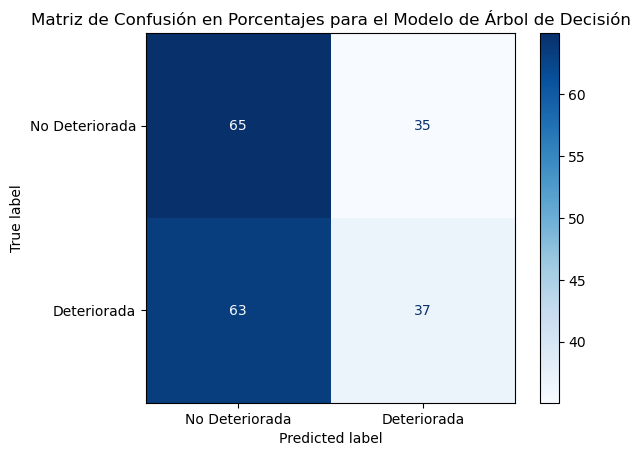

Exactitud: 0.5584
Puntuación F1: 0.5640


In [5]:
# Calcular la matriz de confusión en porcentajes
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Mostrar la matriz de confusión en porcentajes
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_percentage, display_labels=['No Deteriorada', 'Deteriorada'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión en Porcentajes para el Modelo de Árbol de Decisión')
plt.show()

# Mostrar resultados de evaluación
print(f'Exactitud: {accuracy:.4f}')
print(f'Puntuación F1: {f1:.4f}')


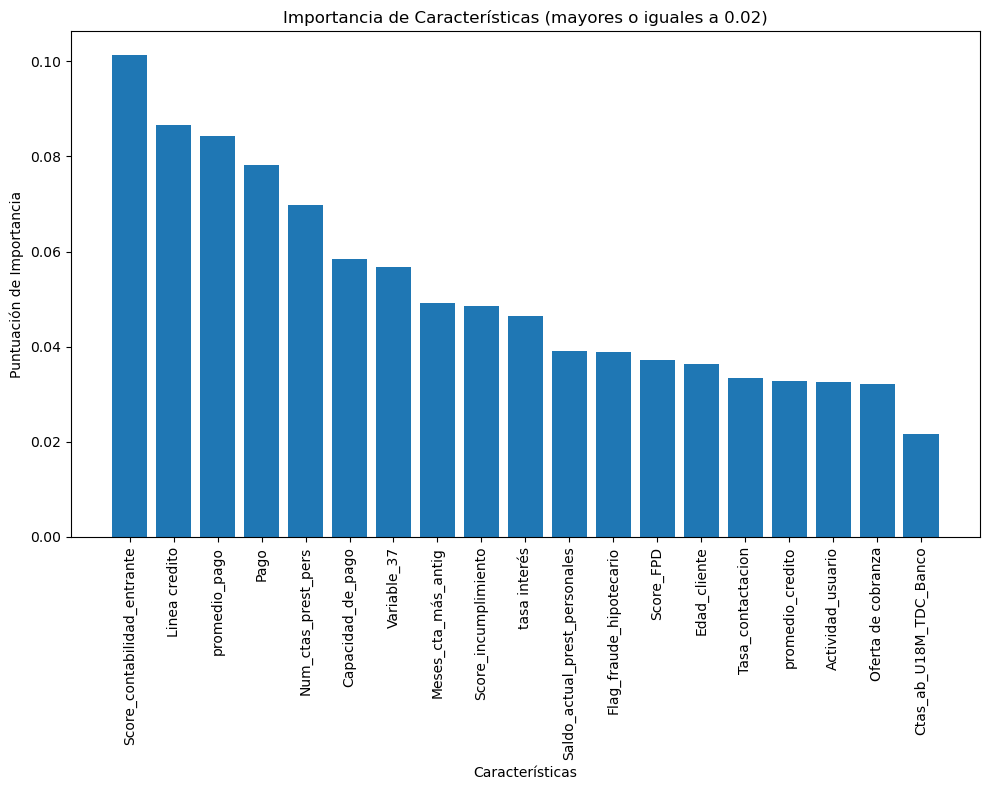

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Entrenar el modelo como antes
model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5
)
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Crear un DataFrame para visualizar la importancia de cada característica
features_df = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': feature_importances
})

# Filtrar características con importancia >= 0.02
filtered_features = features_df[features_df['Importancia'] >= 0.02]
filtered_features = filtered_features.sort_values(by='Importancia', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 8))
plt.bar(filtered_features['Característica'], filtered_features['Importancia'])
plt.xlabel('Características')
plt.ylabel('Puntuación de Importancia')
plt.title('Importancia de Características (mayores o iguales a 0.02)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Características seleccionadas: ['Edad_cliente' 'Saldo_actual_prest_personales'
 'Número_ctas_atraso_prest_personales_U3M' 'Ctas_ab_U18M_TDC_Banco'
 'Meses_cta_más_antig' 'Flag_fraude_hipotecario' 'Actividad_usuario'
 'Variable_37' 'Score_FPD' 'Score_incumplimiento' 'Tasa_contactacion'
 'Score_contabilidad_entrante' 'Linea credito' 'tasa interés' 'Pago'
 'Oferta de cobranza' 'promedio_credito' 'promedio_pago'
 'Capacidad_de_pago']


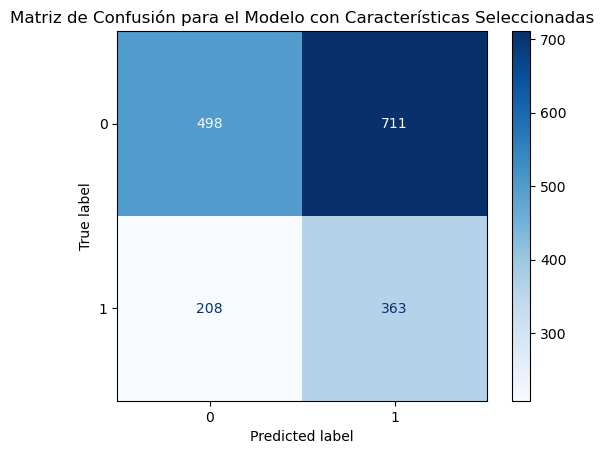

Exactitud: 0.4837
Puntuación F1: 0.4948


In [8]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Cargar el archivo de datos
data_path = 'filtered_merged_data_unique.csv'
data = pd.read_csv(data_path)

# Variables a aplicar Winsorización
winsorize_columns = [
    'Edad_cliente', 'Ingreso_Bruto', 'Linea credito',
    'Plazo_Meses', 'Pago', 'Gasto_mensual_telefonia', 'Actividad_usuario'
]

# Aplicar Winsorización para limitar valores extremos al percentil 1% y 99%
for column in winsorize_columns:
    data[column] = winsorize(data[column], limits=[0.01, 0.01])

# Variables a aplicar transformación logarítmica (reemplazando valores no positivos)
log_transform_columns = ['Gasto_ultimos_60_días', 'Score_FPD', 'Score_incumplimiento']
for column in log_transform_columns:
    data[column] = data[column].apply(lambda x: x if x > 0 else 1)  # Reemplazar valores <= 0 con 1
    data[column] = np.log1p(data[column])  # log1p es log(1 + x)

# Limpieza inicial
data['Entidad_federativa'] = data['Entidad_federativa'].fillna(data['Entidad_federativa'].mode()[0])
data['Tipo_suscripcion'] = data['Tipo_suscripcion'].fillna('Desconocido')

# Agregar variables agregadas y demás procesamiento previo al modelo
client_aggregates = data.groupby('Solicitud_id').agg(
    total_solicitudes=('Solicitud_id', 'size'),
    promedio_credito=('Linea credito', 'mean'),
    promedio_plazo_meses=('Plazo_Meses', 'mean'),
    promedio_pago=('Pago', 'mean')
).reset_index()

data = pd.merge(data, client_aggregates, on='Solicitud_id', how='left')

# Calcular capacidad de pago y transformar `Estatus_Cuenta`
data['Capacidad_de_pago'] = data['Ingreso_Bruto'] / (data['Pago'] + 1)
data['Estatus_Cuenta'] = data['Estatus_Cuenta'].apply(lambda x: 1 if x == "Cuenta Deteriorada" else 0)

# Codificación de variables categóricas
categorical_columns = ['Entidad_federativa', 'Tipo_suscripcion', 'Nivel_Atraso', 'Oferta de cobranza']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

# Normalización de columnas numéricas
# Excluir 'Solicitud_id' de las columnas numéricas a escalar
numeric_columns = data.select_dtypes(include=[float, int]).columns.difference(['Estatus_Cuenta', 'Solicitud_id'])
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Definir características y objetivo
X = data.drop(columns=['Solicitud_id', 'Estatus_Cuenta', 'Interacciones'])
y = data['Estatus_Cuenta']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo inicial para obtener las importancias de las características
initial_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5
)
initial_model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = initial_model.feature_importances_
features_df = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': feature_importances
})

# Filtrar características con importancia >= 0.02
relevant_features = features_df[features_df['Importancia'] >= 0.02]['Característica'].values
print(f'Características seleccionadas: {relevant_features}')

# Crear un nuevo conjunto de datos solo con las características relevantes
X_train_reduced = X_train[relevant_features]
X_test_reduced = X_test[relevant_features]

# Entrenar un nuevo modelo con las características seleccionadas
final_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5
)
final_model.fit(X_train_reduced, y_train)

# Evaluar el modelo reducido
y_pred = final_model.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=final_model.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión para el Modelo con Características Seleccionadas')
plt.show()

# Mostrar resultados de evaluación
print(f'Exactitud: {accuracy:.4f}')
print(f'Puntuación F1: {f1:.4f}')


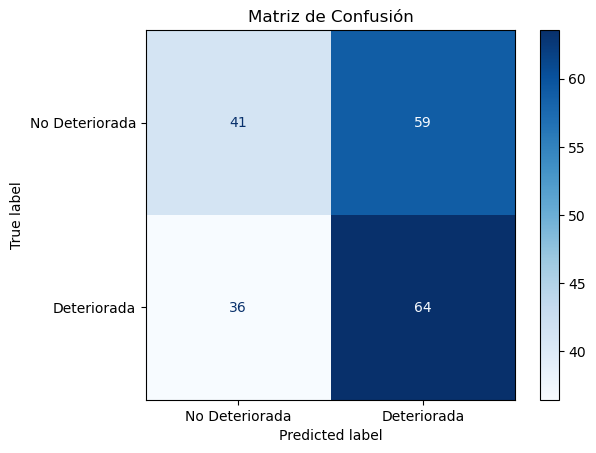

Exactitud: 0.4837
Puntuación F1: 0.4948


In [9]:
# Calcular la matriz de confusión en porcentajes
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Mostrar la matriz de confusión en porcentajes
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_percentage, display_labels=['No Deteriorada', 'Deteriorada'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar resultados de evaluación
print(f'Exactitud: {accuracy:.4f}')
print(f'Puntuación F1: {f1:.4f}')


In [10]:
# Asegúrate de que los índices de X y data estén alineados
X = X.reset_index(drop=True)
data = data.reset_index(drop=True)

# Crear el conjunto de características reducidas para todo el conjunto de datos
X_reduced = X[relevant_features]

# Calcular las probabilidades de deterioro para cada cliente
probabilities = final_model.predict_proba(X_reduced)[:, 1]

# Agregar la columna 'probabilidad deterioro' al DataFrame original
data['probabilidad_deterioro'] = probabilities

data

,Solicitud_id,Aprobado,Hit_Buro_Huella,Malo,Num_IQ_U3M_PL_Financieras,Edad_cliente,Porcentaje_cuentas_abiertas,Num_IQ_U3M,Num_IQ_U3M_TDC_Banco,MaxMOP_U3M,...,Nivel_Atraso,Interacciones,Oferta de cobranza,Estatus_Cuenta,total_solicitudes,promedio_credito,promedio_plazo_meses,promedio_pago,Capacidad_de_pago,probabilidad_deterioro
0,1993059.0,0.0,0.434084,-0.475310,0.793674,-0.211244,0.207937,-0.733333,0.721216,-0.753267,...,-2.013881,"[{'Tipo_GestiÃ³n': 'Agencias Especializadas', ...",0.458632,1,0.0,-0.301067,1.465641,-0.657608,0.216806,0.595209
1,1993287.0,0.0,0.434084,2.103889,0.793674,0.526908,1.322360,-0.733333,0.721216,0.997175,...,0.287531,"[{'Tipo_GestiÃ³n': 'Call Center', 'Resultado':...",1.350192,0,0.0,-0.407339,0.481857,-0.661526,-0.066887,0.595209
2,1993534.0,0.0,0.434084,2.103889,3.598133,0.034806,0.238893,1.983188,0.721216,0.997175,...,-0.287822,"[{'Tipo_GestiÃ³n': 'Call Center', 'Resultado':...",0.458632,1,0.0,0.619954,1.465641,0.396294,2.758414,1.000000
3,1995491.0,0.0,0.434084,-0.475310,1.494789,0.526908,1.941484,-0.239420,0.721216,0.997175,...,-0.287822,"[{'Tipo_GestiÃ³n': 'Call Center', 'Resultado':...",0.458632,0,0.0,-1.009545,-1.485712,-0.905492,-0.610518,0.390277
4,1995795.0,0.0,0.105530,2.103889,0.793674,-1.195447,-0.027013,1.736231,0.721216,0.997175,...,-2.013881,"[{'Tipo_GestiÃ³n': 'Agencias Especializadas', ...",-1.324487,1,0.0,2.178605,0.481857,1.785841,-0.616822,0.767161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5926,7372548.0,0.0,0.434084,-0.475310,1.494789,-0.211244,-0.259845,-0.239420,-0.643881,-0.753267,...,0.287531,"[{'Tipo_GestiÃ³n': 'GestiÃ³n Puerta a Puerta',...",0.458632,0,0.0,0.637666,-0.501927,0.531715,-0.809325,0.507744
5927,7373175.0,0.0,0.105530,2.103889,-0.608555,0.034806,-0.181227,0.007537,-0.643881,-0.503204,...,-0.863175,"[{'Tipo_GestiÃ³n': 'GestiÃ³n Puerta a Puerta',...",0.458632,0,0.0,-0.655306,-0.501927,-0.614789,0.044658,0.552041
5928,7373878.0,0.0,0.434084,-0.475310,-0.608555,-0.580320,-0.063298,0.254493,2.086312,0.997175,...,0.287531,"[{'Tipo_GestiÃ³n': 'Agencias Especializadas', ...",-0.432927,0,0.0,-0.832425,-1.485712,-0.612727,0.054675,0.452712
5929,7373973.0,0.0,0.434084,-0.475310,-0.608555,0.649933,-0.186209,0.501449,-0.643881,0.997175,...,-0.287822,"[{'Tipo_GestiÃ³n': 'Agencias Especializadas', ...",0.458632,0,0.0,-0.371915,1.465641,-0.381015,-0.084458,0.507744


In [11]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
cv_scores = cross_val_score(model, X, y, cv=15)  # cv=5 divide los datos en 5 partes
print(f'Puntuaciones de validación cruzada: {cv_scores}')
print(f'Promedio de puntuación en validación cruzada: {cv_scores.mean():.4f}')


Puntuaciones de validación cruzada: [0.59090909 0.43434343 0.56313131 0.44191919 0.5530303  0.44444444
 0.42025316 0.49873418 0.39240506 0.39493671 0.41265823 0.45316456
 0.5164557  0.54177215 0.5721519 ]
Promedio de puntuación en validación cruzada: 0.4820


segundo modelo

Características seleccionadas: ['Edad_cliente' 'Saldo_actual_prest_personales'
 'Número_ctas_atraso_prest_personales_U3M' 'Ctas_ab_U18M_TDC_Banco'
 'Meses_cta_más_antig' 'Flag_fraude_hipotecario' 'Actividad_usuario'
 'Variable_37' 'Score_FPD' 'Score_incumplimiento' 'Tasa_contactacion'
 'Score_contabilidad_entrante' 'Linea credito' 'tasa interés' 'Pago'
 'Oferta de cobranza' 'promedio_credito' 'promedio_pago'
 'Capacidad_de_pago']


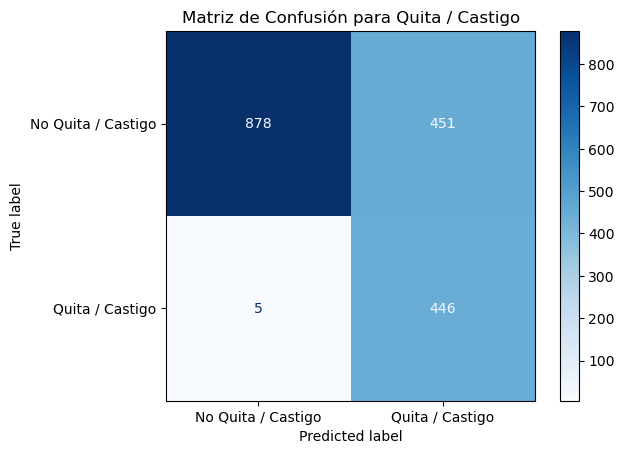

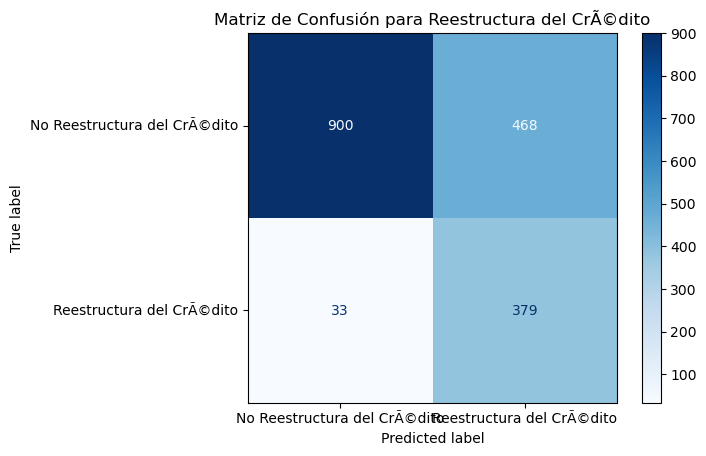

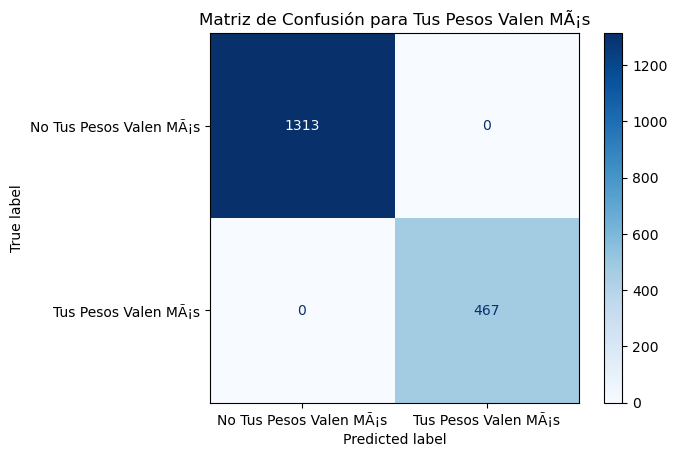

Resultados para Quita / Castigo:
  Exactitud: 0.7438
  Puntuación F1: 0.6617
  Coeficientes: [[-0.00704863  0.05103102 -0.00505537  0.0544919  -0.00884153  0.00213493
   0.11586186  0.23673604 -0.07539105 -0.05566797 -0.11893183 -0.12963421
   0.00161554  0.02639558 -0.01188495 -0.89714888  0.00161554 -0.01188495
  -0.01684844]]
  Intercepto: [-0.15404738]


Resultados para Reestructura del CrÃ©dito:
  Exactitud: 0.7185
  Puntuación F1: 0.6021
  Coeficientes: [[-0.03244848 -0.05660574  0.07179343 -0.02190619 -0.05613444  0.01947734
   0.23840012 -0.17362397 -1.0990012   0.34823866  0.76791201 -0.04011295
   0.03886202 -0.00113664 -0.02998507  0.99555621  0.03886202 -0.02998507
  -0.0172144 ]]
  Intercepto: [-0.17875131]


Resultados para Tus Pesos Valen MÃ¡s:
  Exactitud: 1.0000
  Puntuación F1: 1.0000
  Coeficientes: [[ 1.93837859e-02  2.23954474e-02 -4.30375083e-02  1.43318888e-02
   2.88311288e-02 -1.39190576e-02 -1.24743742e-01  7.47901085e-02
   7.69209617e-02  4.04919572e-02 -6.3

In [12]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Cargar el archivo de datos
data_path = 'filtered_merged_data_unique.csv'
data = pd.read_csv(data_path)

# Variables a aplicar Winsorización
winsorize_columns = [
    'Edad_cliente', 'Ingreso_Bruto', 'Linea credito',
    'Plazo_Meses', 'Pago', 'Gasto_mensual_telefonia', 'Actividad_usuario'
]

# Aplicar Winsorización para limitar valores extremos al percentil 1% y 99%
for column in winsorize_columns:
    data[column] = winsorize(data[column], limits=[0.01, 0.01])

# Variables a aplicar transformación logarítmica (reemplazando valores no positivos)
log_transform_columns = ['Gasto_ultimos_60_días', 'Score_FPD', 'Score_incumplimiento']
for column in log_transform_columns:
    data[column] = data[column].apply(lambda x: x if x > 0 else 1)  # Reemplazar valores <= 0 con 1
    data[column] = np.log1p(data[column])  # log1p es log(1 + x)

# Limpieza inicial
data['Entidad_federativa'] = data['Entidad_federativa'].fillna(data['Entidad_federativa'].mode()[0])
data['Tipo_suscripcion'] = data['Tipo_suscripcion'].fillna('Desconocido')

# Guardar el mapeo original de la oferta de cobranza
label_encoder = LabelEncoder()
data['Oferta_de_cobranza_original'] = data['Oferta de cobranza']
data['Oferta de cobranza'] = label_encoder.fit_transform(data['Oferta de cobranza'])
offer_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Agregar variables agregadas y demás procesamiento previo al modelo
client_aggregates = data.groupby('Solicitud_id').agg(
    total_solicitudes=('Solicitud_id', 'size'),
    promedio_credito=('Linea credito', 'mean'),
    promedio_plazo_meses=('Plazo_Meses', 'mean'),
    promedio_pago=('Pago', 'mean')
).reset_index()

data = pd.merge(data, client_aggregates, on='Solicitud_id', how='left')

# Calcular capacidad de pago y transformar `Estatus_Cuenta`
data['Capacidad_de_pago'] = data['Ingreso_Bruto'] / (data['Pago'] + 1)
data['Estatus_Cuenta'] = data['Estatus_Cuenta'].apply(lambda x: 1 if x == "Cuenta Deteriorada" else 0)

# Codificación de variables categóricas adicionales
categorical_columns = ['Entidad_federativa', 'Tipo_suscripcion', 'Nivel_Atraso']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

# Normalización de columnas numéricas
numeric_columns = data.select_dtypes(include=[float, int]).columns.difference(['Estatus_Cuenta', 'Solicitud_id'])
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Definir características y objetivo para el modelo inicial
X = data.drop(columns=['Solicitud_id', 'Estatus_Cuenta', 'Interacciones', 'Oferta_de_cobranza_original'])
y = data['Estatus_Cuenta']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo inicial para obtener las importancias de las características
initial_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5
)
initial_model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = initial_model.feature_importances_
features_df = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': feature_importances
})

# Filtrar características con importancia >= 0.02
relevant_features = features_df[features_df['Importancia'] >= 0.02]['Característica'].values
print(f'Características seleccionadas: {relevant_features}')

# Modelos de Regresión Logística para Ofertas de Cobranza

# Lista de ofertas excluyendo "Pago sin Beneficio" (ajusta si está codificado)
ofertas_objetivo = [oferta for oferta in offer_mapping.keys() if oferta != "Pago sin Beneficio"]

# Diccionario para almacenar resultados
resultados_ofertas = {}

# Loop sobre cada oferta para entrenar y evaluar un modelo específico
for oferta in ofertas_objetivo:
    # Crear la variable objetivo binaria para la oferta actual
    target_column = f'{oferta}_target'
    data[target_column] = data['Oferta_de_cobranza_original'].apply(lambda x: 1 if x == oferta else 0)

    # Definir características (X) y variable objetivo binaria (y)
    X_oferta = data[relevant_features]
    y_oferta = data[target_column]

    # División de datos en entrenamiento y prueba
    X_train_oferta, X_test_oferta, y_train_oferta, y_test_oferta = train_test_split(X_oferta, y_oferta, test_size=0.3, random_state=42)

    # Entrenar el modelo de regresión logística
    model_oferta = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
    model_oferta.fit(X_train_oferta, y_train_oferta)

    # Realizar predicciones y evaluar el modelo
    y_pred_oferta = model_oferta.predict(X_test_oferta)
    accuracy_oferta = accuracy_score(y_test_oferta, y_pred_oferta)
    f1_oferta = f1_score(y_test_oferta, y_pred_oferta)
    conf_matrix_oferta = confusion_matrix(y_test_oferta, y_pred_oferta)

    # Mostrar la matriz de confusión con nombres originales
    disp_oferta = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_oferta, display_labels=[f'No {oferta}', oferta])
    disp_oferta.plot(cmap='Blues')
    plt.title(f'Matriz de Confusión para {oferta}')
    plt.show()

    # Guardar los resultados en el diccionario
    resultados_ofertas[oferta] = {
        'Exactitud': accuracy_oferta,
        'Puntuación F1': f1_oferta,
        'Coeficientes': model_oferta.coef_,
        'Intercepto': model_oferta.intercept_
    }

    # Eliminar la columna binaria para la siguiente iteración
    data.drop(columns=[target_column], inplace=True)

# Mostrar resultados de evaluación de cada modelo de oferta
for oferta, res in resultados_ofertas.items():
    print(f"Resultados para {oferta}:")
    print(f"  Exactitud: {res['Exactitud']:.4f}")
    print(f"  Puntuación F1: {res['Puntuación F1']:.4f}")
    print(f"  Coeficientes: {res['Coeficientes']}")
    print(f"  Intercepto: {res['Intercepto']}")
    print("\n")

